In [30]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
import seaborn as sns



In [5]:
df=pd.read_csv('data/stud.csv')

In [7]:
x=df.drop('math score',axis=1)

In [11]:
y=df['math score']

In [13]:
num_feat=x.select_dtypes(exclude='object').columns
cat_feat=x.select_dtypes(include='object').columns

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

num_tranform=StandardScaler()
oh_transf=OneHotEncoder()

preprocesser=ColumnTransformer(
    [
        ("OneHotEncoder",oh_transf,cat_feat),
        ("StandardScaler",num_tranform,num_feat),
    ]
)

In [14]:
X=preprocesser.fit_transform(x)

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [19]:
def evaluate(true,predicted):
    mae=mean_absolute_error(true,predicted)
    mse=mean_squared_error(true,predicted)
    rmse=np.sqrt(mean_squared_error(true,predicted))
    r2_scr=r2_score(true,predicted)
    return mae,mse,rmse,r2_scr

In [22]:
models={
    "Linear Regression":LinearRegression(),
    "Lasso":Lasso(),
    "Ridge":Ridge(),
    "KNeighborsRegressor":KNeighborsRegressor(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "RandomForestRegressor":RandomForestRegressor(),
    "CatBoostRegressor":CatBoostRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor()
}
model_list=[]
r2_list=[]

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(x_train,y_train)

    y_train_pred=model.predict(x_train)
    y_test_pred=model.predict(x_test)

    model_train_mae,model_train_mse,model_train_rmse,model_train_r2=evaluate(y_train,y_train_pred)
    model_test_mae,model_test_mse,model_test_rmse,model_test_r2=evaluate(y_test,y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print("Model_performance on Train data")
    print(f"rmse{model_train_rmse}")
    print(f"mae :{model_train_mae}")
    print(f"r2_score: {model_train_r2}")

    print("----------------------------")

    
    print("Model_performance on Test data")
    print(f"rmse{model_test_rmse}")
    print(f"mae :{model_test_mae}")
    print(f"r2_score: {model_test_r2}")
    r2_list.append(model_test_r2)

    print("="*35)
    print('\n')

Linear Regression
Model_performance on Train data
rmse5.323050852720514
mae :4.266711846071957
r2_score: 0.8743172040139593
----------------------------
Model_performance on Test data
rmse5.393993869732845
mae :4.214763142474852
r2_score: 0.8804332983749564


Lasso
Model_performance on Train data
rmse6.593815587795566
mae :5.206302661246526
r2_score: 0.8071462015863456
----------------------------
Model_performance on Test data
rmse6.519694535667421
mae :5.157881810347763
r2_score: 0.8253197323627852


Ridge
Model_performance on Train data
rmse5.323324922741654
mae :4.264987823725981
r2_score: 0.8743042615212909
----------------------------
Model_performance on Test data
rmse5.390387016935637
mae :4.21110068801426
r2_score: 0.8805931485028738


KNeighborsRegressor
Model_performance on Train data
rmse5.70884839525451
mae :4.5177499999999995
r2_score: 0.8554388403823893
----------------------------
Model_performance on Test data
rmse7.249399975170358
mae :5.609
r2_score: 0.78402997636213

In [23]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['Model_Name',"r2_score"]).sort_values(by='r2_score',ascending=False)

,Model_Name,r2_score
2,Ridge,0.880593
0,Linear Regression,0.880433
6,CatBoostRegressor,0.851632
5,RandomForestRegressor,0.851202
7,AdaBoostRegressor,0.841298
1,Lasso,0.825320
3,KNeighborsRegressor,0.784030
4,DecisionTreeRegressor,0.748581


In [27]:
lin_model=LinearRegression(fit_intercept=True)
lin_model=lin_model.fit(x_train,y_train)
y_pred=lin_model.predict(x_test)
score=r2_score(y_test,y_pred)*100
print(f"Accuracy of the model is: {round(score,2)}%")

Accuracy of the model is: 88.04%


Text(0, 0.5, 'Predicted')

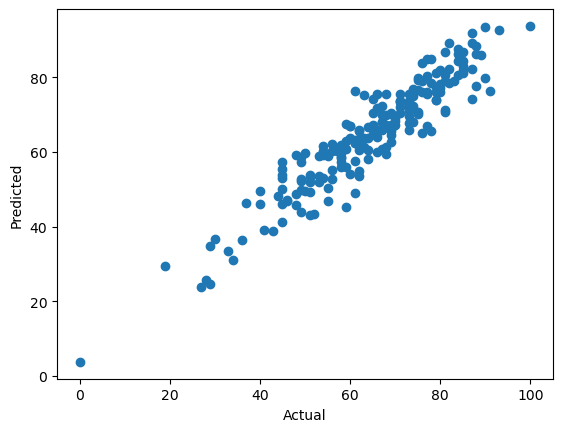

In [31]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual")
plt.ylabel('Predicted')

<Axes: xlabel='math score'>

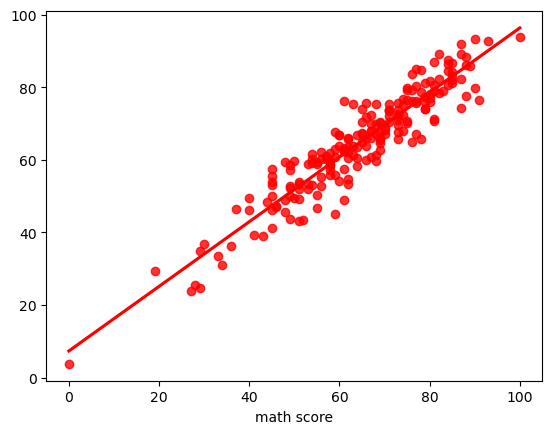

In [33]:
sns.regplot(x=y_test,y=y_pred,ci=None,color='red')